# STAT 198 Quantitative Finance Final Project
## Data Cleaning
Ming Fong and Alex Yang

In [3]:
# pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [86]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from pytrends import dailydata

In [5]:
pytrends = TrendReq(hl = "en-US", tz = 480)
# Up to 5 items in keyword list
kw_list = ["Tesla"]
"""
Categories for cat parameter
https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories
"""
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
trend = pytrends.interest_over_time()

In [6]:
trend

,Tesla,isPartial
date,,
2004-01-01,6,False
2004-02-01,7,False
2004-03-01,8,False
2004-04-01,7,False
2004-05-01,6,False
...,...,...
2020-07-01,81,False
2020-08-01,80,False
2020-09-01,100,False


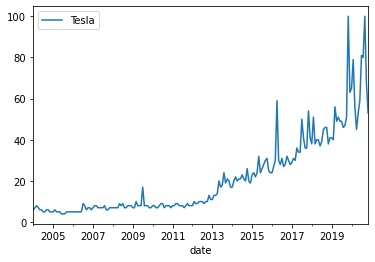

In [7]:
trend.plot()

In [6]:
tsla = yfinance.download("TSLA")
tsla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


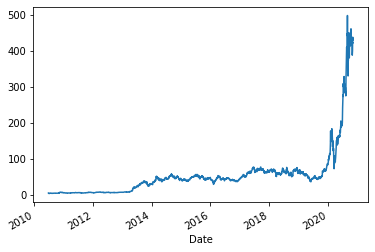

In [7]:
tsla["Adj Close"].plot()

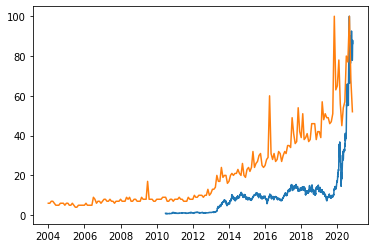

In [8]:
scaled_tsla = tsla["Adj Close"] / tsla["Adj Close"].max() * 100
plt.plot(scaled_tsla)
plt.plot(trend["Tesla"])

In [101]:
daily_trend = dailydata.get_daily_data('TSLA', 2018, 1, 2018, 12, wait_time = 0)

TSLA:2018-01-01 2018-01-31
TSLA:2018-02-01 2018-02-28
TSLA:2018-03-01 2018-03-31
TSLA:2018-04-01 2018-04-30
TSLA:2018-05-01 2018-05-31
TSLA:2018-06-01 2018-06-30
TSLA:2018-07-01 2018-07-31
TSLA:2018-08-01 2018-08-31
TSLA:2018-09-01 2018-09-30
TSLA:2018-10-01 2018-10-31
TSLA:2018-11-01 2018-11-30
TSLA:2018-12-01 2018-12-31


In [102]:
daily_trend.head()

,TSLA_unscaled,TSLA_monthly,isPartial,scale,TSLA
date,,,,,
2018-01-01,11,NaN,NaN,NaN,NaN
2018-01-02,48,NaN,NaN,NaN,NaN
2018-01-03,78,NaN,NaN,NaN,NaN
2018-01-04,100,NaN,NaN,NaN,NaN
2018-01-05,52,NaN,NaN,NaN,NaN


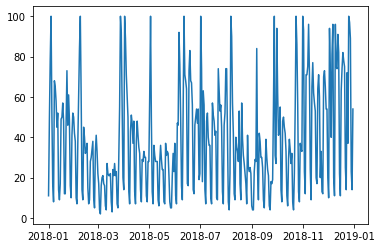

In [104]:
plt.plot(daily_trend['TSLA_unscaled'])

In [106]:
hourly_trend = pytrends.get_historical_interest(kw_list, year_start=2019, month_start=1, day_start=1, hour_start=0, year_end=2019, month_end= 12, day_end=31, hour_end=23, cat=0, geo='', gprop='', sleep=0)
hourly_trend

,Tesla,isPartial
date,,
2019-01-01 00:00:00,0,False
2019-01-01 01:00:00,0,False
2019-01-01 02:00:00,0,False
2019-01-01 03:00:00,0,False
2019-01-01 04:00:00,0,False
...,...,...
2019-12-31 19:00:00,88,False
2019-12-31 20:00:00,90,False
2019-12-31 21:00:00,91,False


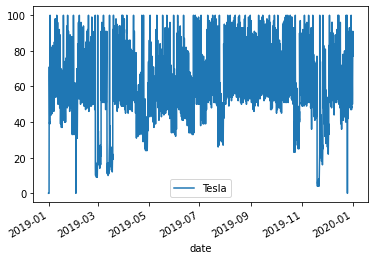

In [107]:
hourly_trend.plot()

In [111]:
hourly_trend['Month'] = hourly_trend.index.month
hourly_trend['Day'] = hourly_trend.index.day

In [120]:
daily_trend = hourly_trend.groupby(['Month', 'Day']).mean()

In [151]:
months = [i[0] for i in daily_trend.index]
days = [i[1] for i in daily_trend.index]
year = [2019] * 365
zipped = zip(year, months, days)
dates = [str(i[0])+"-"+str(i[1])+"-"+str(i[2]) for i in zipped]

In [153]:
daily_trend['Date'] = pd.to_datetime(dates)

In [155]:
daily_trend.index = daily_trend['Date']

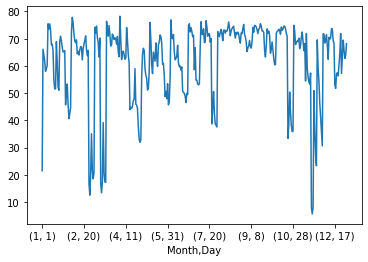

In [124]:
daily_trend['Tesla'].plot()

In [45]:
tesla_volatility = pd.read_csv('TSLA Volatility.csv')

In [62]:
tesla_volatility

,secid,date,days,volatility,index_flag
0,143439,09/04/2012,10,0.297383,0
1,143439,09/04/2012,14,0.402274,0
2,143439,09/04/2012,30,0.495624,0
3,143439,09/04/2012,60,0.553071,0
4,143439,09/04/2012,91,0.533191,0
...,...,...,...,...,...
23954,143439,12/31/2019,273,0.488609,0
23955,143439,12/31/2019,365,0.494881,0
23956,143439,12/31/2019,547,0.558769,0
23957,143439,12/31/2019,730,0.537791,0


In [68]:
thirty_days = tesla_volatility[tesla_volatility['days'] == 30]

In [69]:
thirty_days['date'] = pd.to_datetime(thirty_days['date'])

<ipython-input-69-9896f09414ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirty_days['date'] = pd.to_datetime(thirty_days['date'])


In [70]:
thirty_days.index = thirty_days['date']

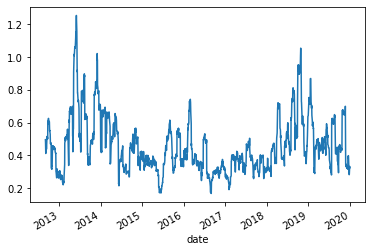

In [71]:
thirty_days['volatility'].plot()

(737060.0, 737424.0)

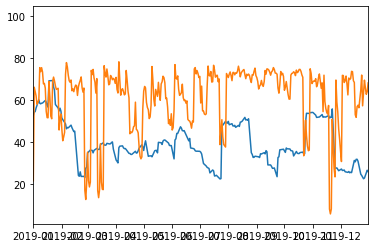

In [165]:
scaled_thirty_days = thirty_days['volatility'] / thirty_days['volatility'].max() * 100
plt.plot(scaled_thirty_days)
plt.plot(daily_trend['Tesla'])
plt.xlim(pd.to_datetime("2019-01-01"), pd.to_datetime('2019-12-31'))